## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  81.079095  1284.988051  0.227143  6.132784  1.352111
1  76.309289   482.800458  0.271935  4.107751  1.002200
2  97.399358   516.770568  0.446961  1.098029  1.145813
3   0.946294   248.972016  0.909766  2.157826  1.578801
4  42.186047   701.839294  0.491944  9.498473  1.433922


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.8916002	total: 58ms	remaining: 57.9s
1:	learn: 0.8858281	total: 58.4ms	remaining: 29.2s
2:	learn: 0.8789988	total: 59ms	remaining: 19.6s
3:	learn: 0.8714205	total: 59.4ms	remaining: 14.8s
4:	learn: 0.8629257	total: 59.9ms	remaining: 11.9s
5:	learn: 0.8552279	total: 60.4ms	remaining: 10s
6:	learn: 0.8466481	total: 60.9ms	remaining: 8.64s
7:	learn: 0.8389418	total: 61.5ms	remaining: 7.63s
8:	learn: 0.8313107	total: 61.9ms	remaining: 6.82s
9:	learn: 0.8283089	total: 62.4ms	remaining: 6.18s
10:	learn: 0.8212311	total: 62.9ms	remaining: 5.65s
11:	learn: 0.8132466	total: 63.3ms	remaining: 5.21s
12:	learn: 0.8066367	total: 63.8ms	remaining: 4.84s
13:	learn: 0.7996455	total: 64.1ms	remaining: 4.52s
14:	learn: 0.7933507	total: 64.5ms	remaining: 4.24s
15:	learn: 0.7876524	total: 65ms	remaining: 4s
16:	learn: 0.7809236	total: 65.4ms	remaining: 3.78s
17:	learn: 0.7746718	total: 65.8ms	remaining: 3.59s
18:	learn: 0.7697483	total: 66.2ms	remaining: 3.42s
19:

117:	learn: 0.4207521	total: 108ms	remaining: 810ms
118:	learn: 0.4183553	total: 109ms	remaining: 806ms
119:	learn: 0.4163931	total: 109ms	remaining: 802ms
120:	learn: 0.4147555	total: 110ms	remaining: 798ms
121:	learn: 0.4131992	total: 110ms	remaining: 793ms
122:	learn: 0.4109292	total: 111ms	remaining: 788ms
123:	learn: 0.4092636	total: 111ms	remaining: 784ms
124:	learn: 0.4074487	total: 111ms	remaining: 779ms
125:	learn: 0.4059586	total: 112ms	remaining: 775ms
126:	learn: 0.4037463	total: 112ms	remaining: 771ms
127:	learn: 0.4022078	total: 113ms	remaining: 767ms
128:	learn: 0.4000254	total: 113ms	remaining: 763ms
129:	learn: 0.3979729	total: 113ms	remaining: 758ms
130:	learn: 0.3956954	total: 114ms	remaining: 754ms
131:	learn: 0.3933162	total: 114ms	remaining: 750ms
132:	learn: 0.3923057	total: 114ms	remaining: 746ms
133:	learn: 0.3909745	total: 115ms	remaining: 742ms
134:	learn: 0.3892528	total: 115ms	remaining: 738ms
135:	learn: 0.3871866	total: 116ms	remaining: 736ms
136:	learn: 

296:	learn: 0.2333028	total: 186ms	remaining: 439ms
297:	learn: 0.2329162	total: 186ms	remaining: 439ms
298:	learn: 0.2325991	total: 187ms	remaining: 437ms
299:	learn: 0.2323100	total: 187ms	remaining: 436ms
300:	learn: 0.2309608	total: 187ms	remaining: 435ms
301:	learn: 0.2305440	total: 188ms	remaining: 434ms
302:	learn: 0.2292725	total: 188ms	remaining: 433ms
303:	learn: 0.2282082	total: 189ms	remaining: 432ms
304:	learn: 0.2274985	total: 189ms	remaining: 431ms
305:	learn: 0.2263798	total: 189ms	remaining: 429ms
306:	learn: 0.2253511	total: 190ms	remaining: 428ms
307:	learn: 0.2250580	total: 190ms	remaining: 427ms
308:	learn: 0.2247522	total: 190ms	remaining: 426ms
309:	learn: 0.2236071	total: 191ms	remaining: 425ms
310:	learn: 0.2223014	total: 191ms	remaining: 423ms
311:	learn: 0.2220423	total: 191ms	remaining: 422ms
312:	learn: 0.2209312	total: 192ms	remaining: 421ms
313:	learn: 0.2206776	total: 192ms	remaining: 420ms
314:	learn: 0.2203888	total: 192ms	remaining: 418ms
315:	learn: 

535:	learn: 0.1102197	total: 290ms	remaining: 251ms
536:	learn: 0.1096760	total: 291ms	remaining: 251ms
537:	learn: 0.1092028	total: 291ms	remaining: 250ms
538:	learn: 0.1087046	total: 292ms	remaining: 249ms
539:	learn: 0.1085004	total: 292ms	remaining: 249ms
540:	learn: 0.1081050	total: 292ms	remaining: 248ms
541:	learn: 0.1076697	total: 293ms	remaining: 247ms
542:	learn: 0.1072591	total: 293ms	remaining: 247ms
543:	learn: 0.1067958	total: 293ms	remaining: 246ms
544:	learn: 0.1064428	total: 294ms	remaining: 245ms
545:	learn: 0.1059672	total: 294ms	remaining: 245ms
546:	learn: 0.1055347	total: 295ms	remaining: 245ms
547:	learn: 0.1053428	total: 296ms	remaining: 244ms
548:	learn: 0.1048953	total: 296ms	remaining: 243ms
549:	learn: 0.1045572	total: 297ms	remaining: 243ms
550:	learn: 0.1042273	total: 297ms	remaining: 242ms
551:	learn: 0.1038643	total: 297ms	remaining: 241ms
552:	learn: 0.1035760	total: 298ms	remaining: 241ms
553:	learn: 0.1035331	total: 298ms	remaining: 240ms
554:	learn: 

713:	learn: 0.0711681	total: 367ms	remaining: 147ms
714:	learn: 0.0710391	total: 368ms	remaining: 147ms
715:	learn: 0.0708975	total: 368ms	remaining: 146ms
716:	learn: 0.0706750	total: 369ms	remaining: 146ms
717:	learn: 0.0704450	total: 369ms	remaining: 145ms
718:	learn: 0.0701319	total: 369ms	remaining: 144ms
719:	learn: 0.0697944	total: 370ms	remaining: 144ms
720:	learn: 0.0695737	total: 370ms	remaining: 143ms
721:	learn: 0.0693433	total: 371ms	remaining: 143ms
722:	learn: 0.0690999	total: 371ms	remaining: 142ms
723:	learn: 0.0688781	total: 372ms	remaining: 142ms
724:	learn: 0.0687675	total: 372ms	remaining: 141ms
725:	learn: 0.0684438	total: 373ms	remaining: 141ms
726:	learn: 0.0683353	total: 373ms	remaining: 140ms
727:	learn: 0.0681141	total: 374ms	remaining: 140ms
728:	learn: 0.0678808	total: 375ms	remaining: 139ms
729:	learn: 0.0676954	total: 375ms	remaining: 139ms
730:	learn: 0.0674660	total: 376ms	remaining: 138ms
731:	learn: 0.0672516	total: 376ms	remaining: 138ms
732:	learn: 

957:	learn: 0.0398412	total: 472ms	remaining: 20.7ms
958:	learn: 0.0396754	total: 473ms	remaining: 20.2ms
959:	learn: 0.0395130	total: 473ms	remaining: 19.7ms
960:	learn: 0.0394568	total: 473ms	remaining: 19.2ms
961:	learn: 0.0393836	total: 474ms	remaining: 18.7ms
962:	learn: 0.0392634	total: 474ms	remaining: 18.2ms
963:	learn: 0.0391053	total: 474ms	remaining: 17.7ms
964:	learn: 0.0389506	total: 475ms	remaining: 17.2ms
965:	learn: 0.0388965	total: 475ms	remaining: 16.7ms
966:	learn: 0.0387968	total: 476ms	remaining: 16.2ms
967:	learn: 0.0387253	total: 476ms	remaining: 15.7ms
968:	learn: 0.0386478	total: 476ms	remaining: 15.2ms
969:	learn: 0.0385694	total: 477ms	remaining: 14.8ms
970:	learn: 0.0384193	total: 477ms	remaining: 14.3ms
971:	learn: 0.0383360	total: 478ms	remaining: 13.8ms
972:	learn: 0.0381890	total: 479ms	remaining: 13.3ms
973:	learn: 0.0381370	total: 479ms	remaining: 12.8ms
974:	learn: 0.0380610	total: 479ms	remaining: 12.3ms
975:	learn: 0.0379181	total: 480ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

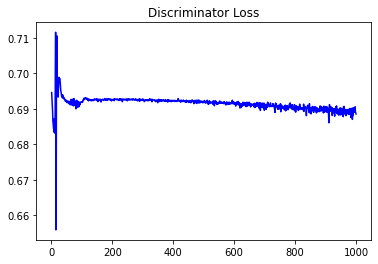

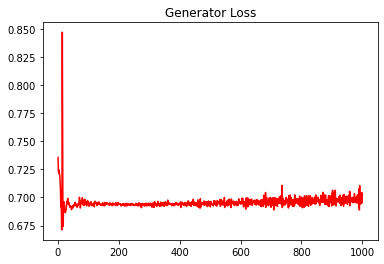

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.7444603642422501


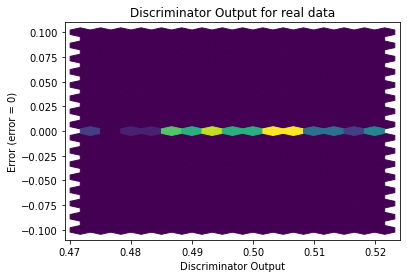

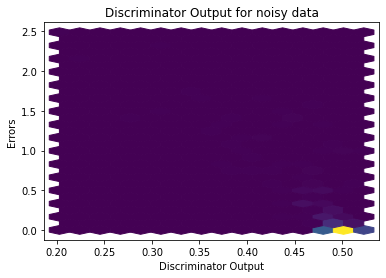

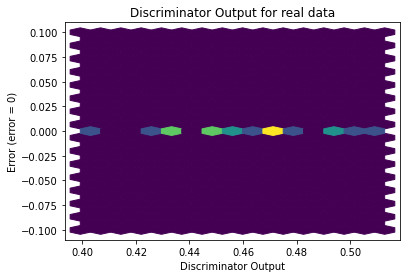

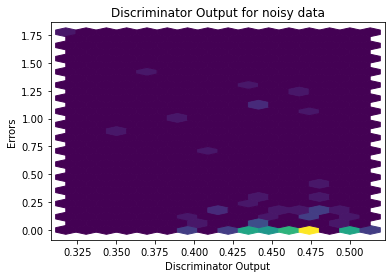

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


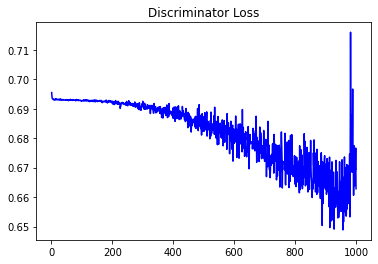

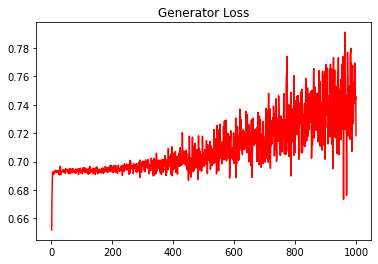

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.7575428813979718


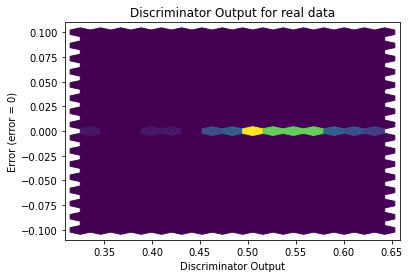

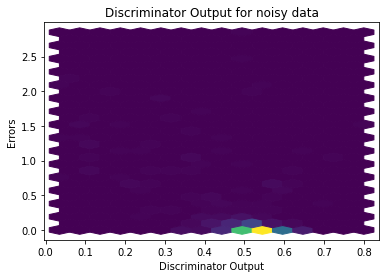

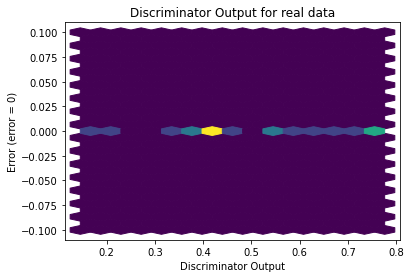

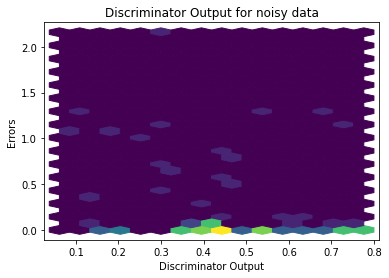

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0233]], requires_grad=True)
